In [1]:
import pandas as pd

In [5]:
train= pd.read_csv("data/train.csv", index_col= "PassengerId")

In [9]:
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. train에서 1) 전체 생존률, 2) 생존자 총인원, 3) 사망자 총인원

In [52]:
survived= train.Survived.sum()
passenger_tot= train.Survived.count()

In [53]:
print(survived)
print(train.Survived.value_counts())
print(train.Survived.value_counts()[1])

342
0    549
1    342
Name: Survived, dtype: int64
342


In [54]:
survived_rate= survived/ passenger_tot* 100

In [59]:
print(passenger_tot- survived)
print(train.Survived.value_counts()[0])

549
549


In [60]:
dead_tot2= passenger_tot- survived

In [56]:
print(f"생존률\t\t{survived_rate:.3f}%")
print(f"생존인원\t{survived}")
print(f"사망인원\t{dead_tot2}")

생존률		38.384%
생존인원	342
사망인원	549


### 2. Survived 칼럼값을 사람이 이해하기 좋도록

In [76]:
fS= lambda x: 'live' if x==1 else 'dead'

In [77]:
train["Survived_humanized"]= train.Survived.map(fS)

In [78]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_humanized
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,dead
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,live
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,live
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,live
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,dead


### 3. Pclass 칼럼값을 사람이 이해하기 좋도록

In [79]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

뭔 값인지 알기: [data overview](https://www.kaggle.com/c/titanic/data)
- 1 FirstClass
- 2 SecondClass
- 3 ThirdClass

In [80]:
pd.pivot_table(data= train, index= "Pclass", values= "Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [81]:
fPc= lambda x: 'FirstClass' if x==1 else ('SecondClass' if x==2 else 'ThirdClass')

In [87]:
train["Pclass_humanized"]= train.Pclass.map(fPc)

In [99]:
train[["Pclass", "Pclass_humanized"]].head(10)

,Pclass,Pclass_humanized
PassengerId,,
1,3,ThirdClass
2,1,FirstClass
3,3,ThirdClass
4,1,FirstClass
5,3,ThirdClass
6,3,ThirdClass
7,1,FirstClass
8,3,ThirdClass
9,3,ThirdClass


In [91]:
pd.pivot_table(data= train, index=["Pclass","Pclass_humanized"], values="Survived")

,,Survived
Pclass,Pclass_humanized,
1,FirstClass,0.629630
2,SecondClass,0.472826
3,ThirdClass,0.242363


### 4. Embarked 칼럼 값을 직관적으로 바꾸기
C = Cherbourg, Q = Queenstown, S = Southampton

In [101]:
train.Embarked.head()

PassengerId
1    S
2    C
3    S
4    S
5    S
Name: Embarked, dtype: object

In [102]:
fEm= lambda x: 'Cherbourg' if 'C'==x else ('Queenstown' if 'Q'==x else 'Southampton')

In [104]:
train["Embarked_humanized"]= train.Embarked.map(fEm)

In [118]:
train[['Embarked','Embarked_humanized', 'Survived']].head(6)

,Embarked,Embarked_humanized,Survived
PassengerId,,,
1,S,Southampton,0
2,C,Cherbourg,1
3,S,Southampton,1
4,S,Southampton,1
5,S,Southampton,0
6,Q,Queenstown,0


In [114]:
print(train.columns.map)
train.columns.map(type)

<bound method Index.map of Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Survived_humanized', 'Pclass_humanized',
       'Embarked_humanized'],
      dtype='object')>


Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>],
      dtype='object')

In [115]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_humanized,Pclass_humanized,Embarked_humanized
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,dead,ThirdClass,Southampton


In [116]:
pd.pivot_table(data= train, index=["Embarked", "Embarked_humanized"]) #values= "Survived"

,,Age,Fare,Parch,Pclass,SibSp,Survived
Embarked,Embarked_humanized,,,,,,
C,Cherbourg,30.814769,59.954144,0.363095,1.886905,0.386905,0.553571
Q,Queenstown,28.089286,13.276030,0.168831,2.909091,0.428571,0.389610
S,Southampton,29.445397,27.079812,0.413043,2.350932,0.571429,0.336957


### 5. Embarked, Pclass 칼럼을 one-hot encoding

In [121]:
train[["Embarked","Pclass"]].head(2)

,Embarked,Pclass
PassengerId,,
1,S,3
2,C,1


In [126]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_humanized,Pclass_humanized,Embarked_humanized
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,dead,ThirdClass,Southampton


In [174]:
df_Emb_dummies= pd.get_dummies(data= train.Embarked, prefix= 'Embarked')
df_Emb_dummies.head(2)

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0


In [175]:
df_Pcl_dummies= pd.get_dummies(data= train.Pclass, prefix= 'Pclass')
df_Pcl_dummies.head(2)

,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,
1,0,0,1
2,1,0,0


집어넣는 방법?
- [insert](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.insert.html) > train2.insert(loc= 11, column= 'Embarked_C', value= df_Emb_dummies['Embarked_C'])
    - 하나는 적당. 그러나 여러개는 ..?
- [append](https://stackoverflow.com/questions/41181779/merging-2-dataframes-vertically)
- [concat](https://pandas.pydata.org/pandas-docs/stable/merging.html)
    - pd.concat([train2, df_Emb_dummies, df_Pcl_dummies], sort=True, axis= 1)
    - axis 없는 기본 값은 행 단위로 붙는거라, columns을 새로 넣을거면 axis= 1

In [157]:
# train2.drop('Embarked_C', axis=1, inplace= True)

In [192]:
train= pd.concat([train, df_Emb_dummies, df_Pcl_dummies], sort=True, axis= 1)

In [194]:
print(train.columns)
train.shape

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Survived_humanized', 'Pclass_humanized',
       'Embarked_humanized', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')


(891, 20)

### 6. Age컬럼에서 평균표준편차 민맥스 출력
- [pandas var](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.var.html) ,  [표준편차](http://hidekuma.tistory.com/3)
- 표준편차?

In [232]:
age_mean= train.Age.mean()
age_std= train.Age.std()
age_max= train.Age.max()
age_min= train.Age.min()

In [233]:
print(f"{age_mean:.3f}")
print(f"{age_std:.3f}")
print(f"{age_max:.3f}")
print(f"{age_min:.3f}")

29.699
14.526
80.000
0.420


[statistics](http://www.scipy-lectures.org/packages/statistics/index.html)

In [196]:
from statsmodels.formula.api import ols

In [200]:
model= ols("Survived~Age", train).fit()

In [209]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.271
Date:                Mon, 02 Jul 2018   Prob (F-statistic):             0.0391
Time:                        11:27:36   Log-Likelihood:                -503.28
No. Observations:                 714   AIC:                             1011.
Df Residuals:                     712   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4838      0.042     11.576      0.000       0.402       0.566
Age           -0.0026      0.001     -2.067      0.039      -0.005      -0.000
==============================================================================
Omnibus:                       16.419   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.965
Skew:                           0.380   Prob(JB):                     3.99e-26
Kurtosis:                       1.168   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7.객실 등급별 Age평균
비싼 객실일 수록 평균 나이가 높구나

In [236]:
pd.pivot_table(data= train, index=['Pclass'], values='Age')

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


데이터.groupby(['무슨칼럼별'])['대상칼럼'].함수

In [239]:
train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

### 8.나이를 범위별로 나눠서, 범위별 생존률
임의값: 15, 30 기준으로 나눠보자

In [290]:
train.loc[train.Survived[train.Age>=30], ""]

0    196
1    134
Name: Survived, dtype: int64

In [306]:
train.query('15<= Age and Age< 30')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_humanized,Pclass_humanized,Embarked_humanized,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,dead,ThirdClass,Southampton,0,0,1,0,0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,live,ThirdClass,Southampton,0,0,1,0,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,live,ThirdClass,Southampton,0,0,1,0,0,1
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,dead,ThirdClass,Southampton,0,0,1,0,0,1
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,live,ThirdClass,Queenstown,0,1,0,0,0,1
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,live,FirstClass,Southampton,0,0,1,1,0,0
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,dead,FirstClass,Southampton,0,0,1,1,0,0
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,dead,FirstClass,Cherbourg,1,0,0,1,0,0
38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S,dead,ThirdClass,Southampton,0,0,1,0,0,1


---
이하: 어떻게 생긴지 봄

In [245]:
from statsmodels.formula.api import ols

In [243]:
model= ols("Survived~Age", data= train).fit()

In [244]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.271
Date:                Mon, 02 Jul 2018   Prob (F-statistic):             0.0391
Time:                        11:52:20   Log-Likelihood:                -503.28
No. Observations:                 714   AIC:                             1011.
Df Residuals:                     712   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4838      0.042     11.576      0.000       0.402       0.566
Age           -0.0026      0.001     -2.067      0.039      -0.005      -0.000
==============================================================================
Omnibus:                       16.419   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.965
Skew:                           0.380   Prob(JB):                     3.99e-26
Kurtosis:                       1.168   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[왜도 첨도](https://www.google.co.kr/search?q=%EC%99%9C%EB%8F%84+%EC%B2%A8%EB%8F%84&newwindow=1&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjTlY7Utf_bAhVFMt4KHTgYBQUQ_AUICigB&biw=931&bih=994#imgrc=Zv8cdfkfoiYgsM:)
- 왜도 Skewness. 양수면 왼쪽으로 쏠려있는 데이터(오른쪽으로 꼬리가 긴)
    - 중앙값 median < 평균 mean
- 첨도 Kurtosis. 양수면 정규분포보다 뾰족

In [257]:
print('{0:.3f}'.format(train.Age.mean()))

29.699


In [259]:
print('%.3f'%train.Age.mean())

29.699


In [260]:
train.Age.median()

28.0

In [261]:
print(train.Age.max())
print(train.Age.min())

80.0
0.42


In [285]:
import seaborn as sns
# %matpotlib inline

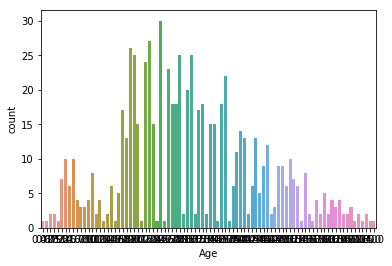

In [283]:
sns.countplot(data= train, x= "Age", )